# An Electrochemical Impedance Spectrum in 2D
This notebook contains an interactive visualization of the frequency dependent impedance
of a simple electrical circuit (usually referred to as an equivalent circuit, or an equivalent circuit model
in electrochemistry), -R-(RC)-. The data is displayed in a complex plane plot (a Nyquist plot) and a Bode plot. The latter is usually a plot of the modulus of the impedance, and the phase angle, *vs* the logarithm of the frequency, but in this case I have chosen to plot the (negative of the) imaginary part of the complex impedance *vs* 
the logarithm of the frequency.

The notebook is written for use with Python 3 and uses ipywidgets for interactivity.

In [1]:
#python dependencies
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, RadioButtons

#change the default font set (matplotlib.rc)
mpl.rc('mathtext', fontset='stixsans', default='regular')
#increase text size somewhat
mpl.rcParams.update({'axes.labelsize':12, 'font.size': 12})

In [2]:
#set up notebook for inline plots
%matplotlib inline

In [3]:
#generate an angular frequency range

def ang_freq_range(fstart = 9685000, fstop = 0.0968, pts_per_decade = 12):
    """returns an angular frequency range as a numpy array, 
       between fstart [Hz] and fstop [Hz], with a set number
       of points per decade (defaults to 12)"""
    decades = np.log10(fstart)-np.log10(fstop)
    pts_total = np.around(decades*pts_per_decade)
    frange = np.logspace(np.log10(fstop),np.log10(fstart), pts_total, endpoint=True)
    return 2*np.pi*frange

w = ang_freq_range()

In [4]:
#define function that returns impedance of -R-(RC)- circuit

def Z_R_RC(R0, R1, C1, w):
    """Returns the impedance of a -R-(RC)- circuit.
    Input
    =====
    R0 = series resistance (Ohmic resistance) of circuit
    R1 = resistance of parallel connected circuit element
    C1 = capacitance of parallel connected circuit element
    w = angular frequency, accepts an array as well as a single number
    
    Output
    ======
    The frequency dependent impedance as a complex number."""
    Z_R0 = R0
    Z_R1 = R1
    Z_C1 = -1j/(w*C1) #capacitive reactance
    Z_RC = 1/(1/Z_R1 + 1/Z_C1) #parallel connection
    return Z_R0 + Z_RC #Z_R0 and Z_RC connected in series

In [5]:
#define 2D plot function(Nyquist / Complex Plane)

def plot_nyquist(R0,R1,C1):
    Z = Z_R_RC(R0,R1,C1,np.logspace(7,0,7*12))
    #set up a figure canvas with two plot areas (sets of axes)
    fig,ax = plt.subplots(nrows=2, ncols=1)
    #add a Nyquist plot (first plot)
    ax[0].plot(Z.real, -1*Z.imag, marker='o',ms=5, mec='b', mew=0.7, mfc='none')
    ax[0].set_xlim(0,60)
    ax[0].set_ylim(0,25)
    ax[0].set_aspect('equal')
    ax[0].set_xlabel('Z$_{real}$ [$\Omega$]')
    ax[0].set_ylabel('-Z$_{imag}$ [$\Omega$]')
    #add a Bode plot with 
    ax[1].plot(np.logspace(7,0,7*12)/2*np.pi,-1*Z.imag, marker='o',ms=5, mec='b', mew=0.7, mfc='none')
    ax[1].set_xscale("log")
    ax[1].set_xlim(min(w),max(w))
    ax[1].set_ylim()
    ax[1].set_ylabel('-Z$_{imag}$ [$\Omega$]')
    ax[1].set_xlabel('frequency [Hz]')
    plt.tight_layout()

### Interactive Plot
to-do: add text and vector graphic illustrating equivalent circuit used

<function __main__.plot_nyquist>

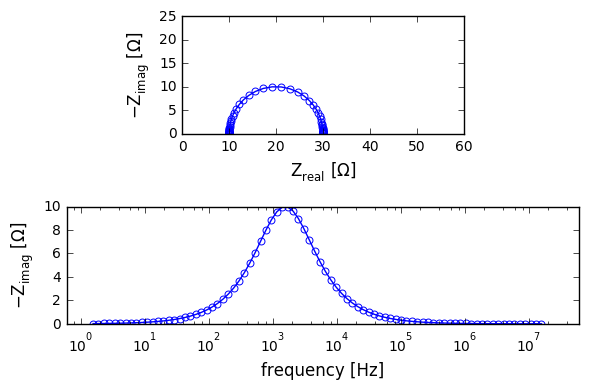

In [6]:
interact(plot_nyquist, R0=(1,20), R1=(1,40), C1=(1e-6, 1e-4, 1e-6))

JR Johansson's excellent `version information` extension (see [here](https://nbviewer.jupyter.org/github/jrjohansson/version_information/blob/master/example.ipynb) for install and usage instructions):

In [7]:
%load_ext version_information

In [8]:
%version_information numpy, matplotlib, ipywidgets

Software versions
Python 3.5.2 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
numpy 1.10.4
matplotlib 1.5.1
ipywidgets 5.2.2
Fri Dec 23 12:53:43 2016 GMT